## Gestational Diabetes Mellitus


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- To classify if GDM is present or not based on patients' constraints


### 2) Data Collection
- Dataset Source - Kaggle
- The data consists of 17 column and 3525 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [7]:
pip install numpy pandas seaborn

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------- ---------------------- 71.7/165.5 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
    --------------------------------------- 0.2/14.9 MB 13.4 MB/s eta 0:00:02
   - -------------------------------------- 0.6/14.9 MB 8.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/14.9 MB 8.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/14.9 MB 8.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/14.9 MB 8.2 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/14.9 MB 7.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.4/14.9 MB 8.2 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/14.9 MB 8.6 MB/s eta 0:00:02
   --------- ------------------------------ 3.5/14.9 MB 9.0 MB/s eta 0:00:02
   

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [9]:
df = pd.read_csv('Data/GDM.csv')

#### Show Top 5 Records

In [10]:
df.head()

,Case_Number,Age,No_of_Pregnancy,Gestation_in_previous_Pregnancy,BMI,HDL,Family_History,unexplained_prenetal_loss,Large_Child_or_Birth_Default,PCOS,Sys_BP,Dia_BP,OGTT,Hemoglobin,Sedentary_Lifestyle,Prediabetes,Result
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


#### Shape of the dataset

In [11]:
df.shape

(3525, 17)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check & Fill Missing values

In [12]:
df.isna().sum()

Case_Number                           0
Age                                   0
No_of_Pregnancy                       0
Gestation_in_previous_Pregnancy       0
BMI                                1081
HDL                                1001
Family_History                        0
unexplained_prenetal_loss             0
Large_Child_or_Birth_Default          0
PCOS                                  0
Sys_BP                             1705
Dia_BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary_Lifestyle                   0
Prediabetes                           0
Result                                0
dtype: int64

#### The missing values for each column is given

In [16]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 1].index.tolist()

for column in df.columns:
    if column in columns_with_missing_values:
        # Filling categorical columns with the mode
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        # Filling numerical columns with the mean
        else:
            df[column].fillna(df[column].mean(), inplace=True)


In [17]:
df.isna().sum()

Case_Number                        0
Age                                0
No_of_Pregnancy                    0
Gestation_in_previous_Pregnancy    0
BMI                                0
HDL                                0
Family_History                     0
unexplained_prenetal_loss          0
Large_Child_or_Birth_Default       0
PCOS                               0
Sys_BP                             0
Dia_BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary_Lifestyle                0
Prediabetes                        0
Result                             0
dtype: int64

#### No missing values anymore

### 3.2 Check Duplicates

In [13]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [14]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case_Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No_of_Pregnancy                  3525 non-null   int64  
 3   Gestation_in_previous_Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family_History                   3525 non-null   int64  
 7   unexplained_prenetal_loss        3525 non-null   int64  
 8   Large_Child_or_Birth_Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys_BP                           1820 non-null   float64
 11  Dia_BP                           3525 non-null   int64  
 12  OGTT                

### 3.4 Checking the number of unique values of each column

In [18]:
df.nunique()

Case_Number                        3525
Age                                  26
No_of_Pregnancy                       4
Gestation_in_previous_Pregnancy       3
BMI                                 273
HDL                                  57
Family_History                        2
unexplained_prenetal_loss             2
Large_Child_or_Birth_Default          2
PCOS                                  2
Sys_BP                               97
Dia_BP                               65
OGTT                                253
Hemoglobin                           88
Sedentary_Lifestyle                   2
Prediabetes                           2
Result                                2
dtype: int64

### 3.5 Check statistics of data set

In [19]:
df.describe()

,Case_Number,Age,No_of_Pregnancy,Gestation_in_previous_Pregnancy,BMI,HDL,Family_History,unexplained_prenetal_loss,Large_Child_or_Birth_Default,PCOS,Sys_BP,Dia_BP,OGTT,Hemoglobin,Sedentary_Lifestyle,Prediabetes,Result
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.00000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1763.000000,32.581277,2.076312,0.960851,27.854092,46.471870,0.498156,0.364823,0.35773,0.264681,135.762088,81.538156,170.707503,13.959801,0.449645,0.293050,0.389220
std,1017.724177,6.169107,0.838637,0.722313,4.758171,9.138967,0.500068,0.481449,0.47940,0.441226,16.339666,11.379758,44.517304,1.863969,0.497529,0.455226,0.487643
min,1.000000,20.000000,1.000000,0.000000,13.300000,15.000000,0.000000,0.000000,0.00000,0.000000,90.000000,60.000000,80.000000,8.800000,0.000000,0.000000,0.000000
25%,882.000000,28.000000,1.000000,0.000000,25.900000,45.000000,0.000000,0.000000,0.00000,0.000000,132.000000,74.000000,147.000000,12.700000,0.000000,0.000000,0.000000
50%,1763.000000,32.000000,2.000000,1.000000,27.854092,46.471870,0.000000,0.000000,0.00000,0.000000,135.762088,81.000000,165.000000,14.000000,0.000000,0.000000,0.000000
75%,2644.000000,37.000000,3.000000,1.000000,29.600000,52.000000,1.000000,1.000000,1.00000,1.000000,135.762088,86.000000,184.000000,15.000000,1.000000,1.000000,1.000000
max,3525.000000,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


#### Insights
1. Age Distribution: Range is from 20 to 45 years & the average age is approximately 32.58 years, with a standard deviation of 6.17 years, indicating a moderately wide age distribution.
2. Most participants have had one or two pregnancies.
3. Majority have no or one previous gestation.
4. Health Metrics:
    1. BMI (Body Mass Index) varies significantly, ranging from 13.3 to 45, with an average of 27.85.
    2. HDL (High-Density Lipoprotein) levels range from 15 to 70, with an average of 46.47.
    3. Systolic BP (Sys_BP) and Diastolic BP (Dia_BP) are within the normal range but participants have both low and high blood pressure.

5. About half of the participants have a family history of diabetes or related conditions (Mean of 0.498).
6. Unexplained prenatal loss, large child or birth default, and PCOS are relatively rare in the dataset.
7. OGTT (Oral Glucose Tolerance Test) ranges from 80 to 403, with a mean of 170.71, indicating significant variability in glucose tolerance levels.
8. A normal distribution of hemoglobin levels but with some potential outliers at both ends.
9. Approximately 29.3% of participants are Prediabetic & 45% have Sedentary Lifestyle.
10. The Result variable has a mean of 0.39 => around 39% of participants have the condition being studied (possibly diabetes or prediabetes).

### 3.7 Exploring Data

In [20]:
df.head()

,Case_Number,Age,No_of_Pregnancy,Gestation_in_previous_Pregnancy,BMI,HDL,Family_History,unexplained_prenetal_loss,Large_Child_or_Birth_Default,PCOS,Sys_BP,Dia_BP,OGTT,Hemoglobin,Sedentary_Lifestyle,Prediabetes,Result
0,1,22,2,1,27.854092,55.0,0,0,0,0,102.0,69,170.707503,12.0,0,0,0
1,2,26,2,1,27.854092,53.0,0,0,0,0,101.0,63,170.707503,12.4,0,0,0
2,3,29,1,0,27.854092,50.0,0,0,0,0,118.0,79,170.707503,14.3,0,0,0
3,4,28,2,1,27.854092,51.0,0,0,0,0,99.0,70,170.707503,15.0,0,0,0
4,5,21,2,1,27.854092,52.0,0,0,0,0,116.0,65,170.707503,15.0,0,0,0


In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 17 numerical features : ['Case_Number', 'Age', 'No_of_Pregnancy', 'Gestation_in_previous_Pregnancy', 'BMI', 'HDL', 'Family_History', 'unexplained_prenetal_loss', 'Large_Child_or_Birth_Default', 'PCOS', 'Sys_BP', 'Dia_BP', 'OGTT', 'Hemoglobin', 'Sedentary_Lifestyle', 'Prediabetes', 'Result']

We have 0 categorical features : []


### 4. Exploring Data ( Visualization )

#### 4.1 LinePlots For All Features

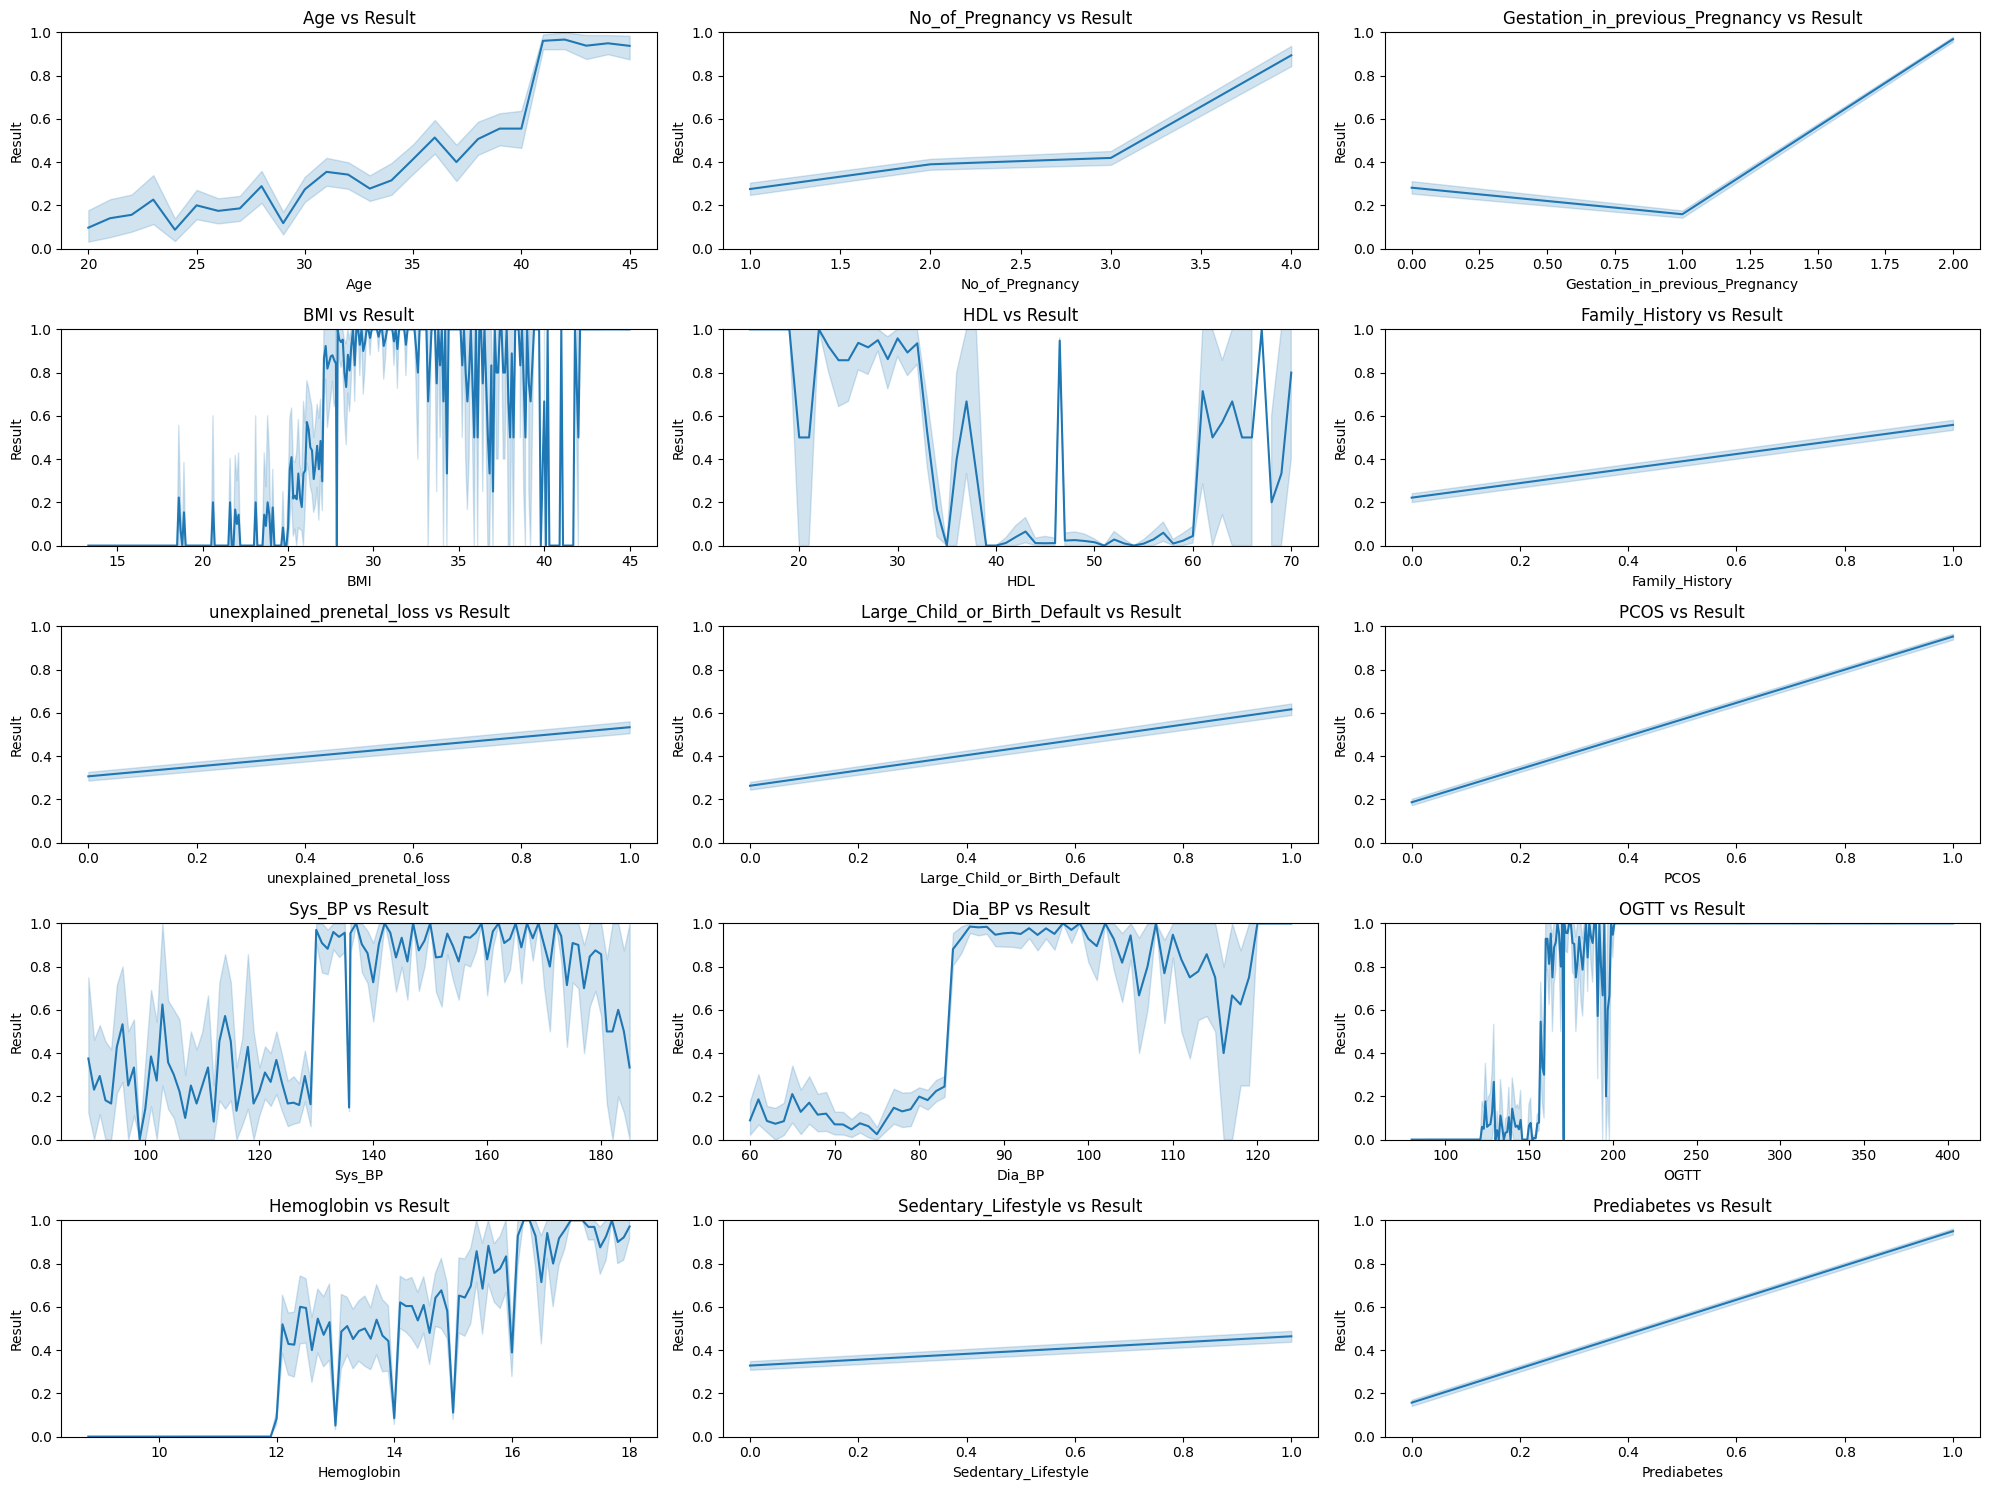

In [51]:
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the first and last columns
columns = columns[1:-1]

plt.figure(figsize=(20, 15))
for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.lineplot(data=df, x=col, y='Result')
    plt.ylim(0, 1)  # Set y-axis limits for Result
    plt.title(f'{col} vs Result')

plt.tight_layout()
plt.show()

#####  Insights
- Prediabetes, PCOS & No. Of Preganancies are almost linearly related.
- Age is also a considerable factor.
- Sedentary Lifestyle, Unexplained Prenatal Loss and Large Child are not much involved but still matter.
- Some Fixed values give almost sure results like Gestation in Previous Pregnancy if 2, then Result is Yes.

#### Note Here: No Need of Feature wise, Univariate & Bivariate Analysis here.

#### 4.2 CHECKING OUTLIERS

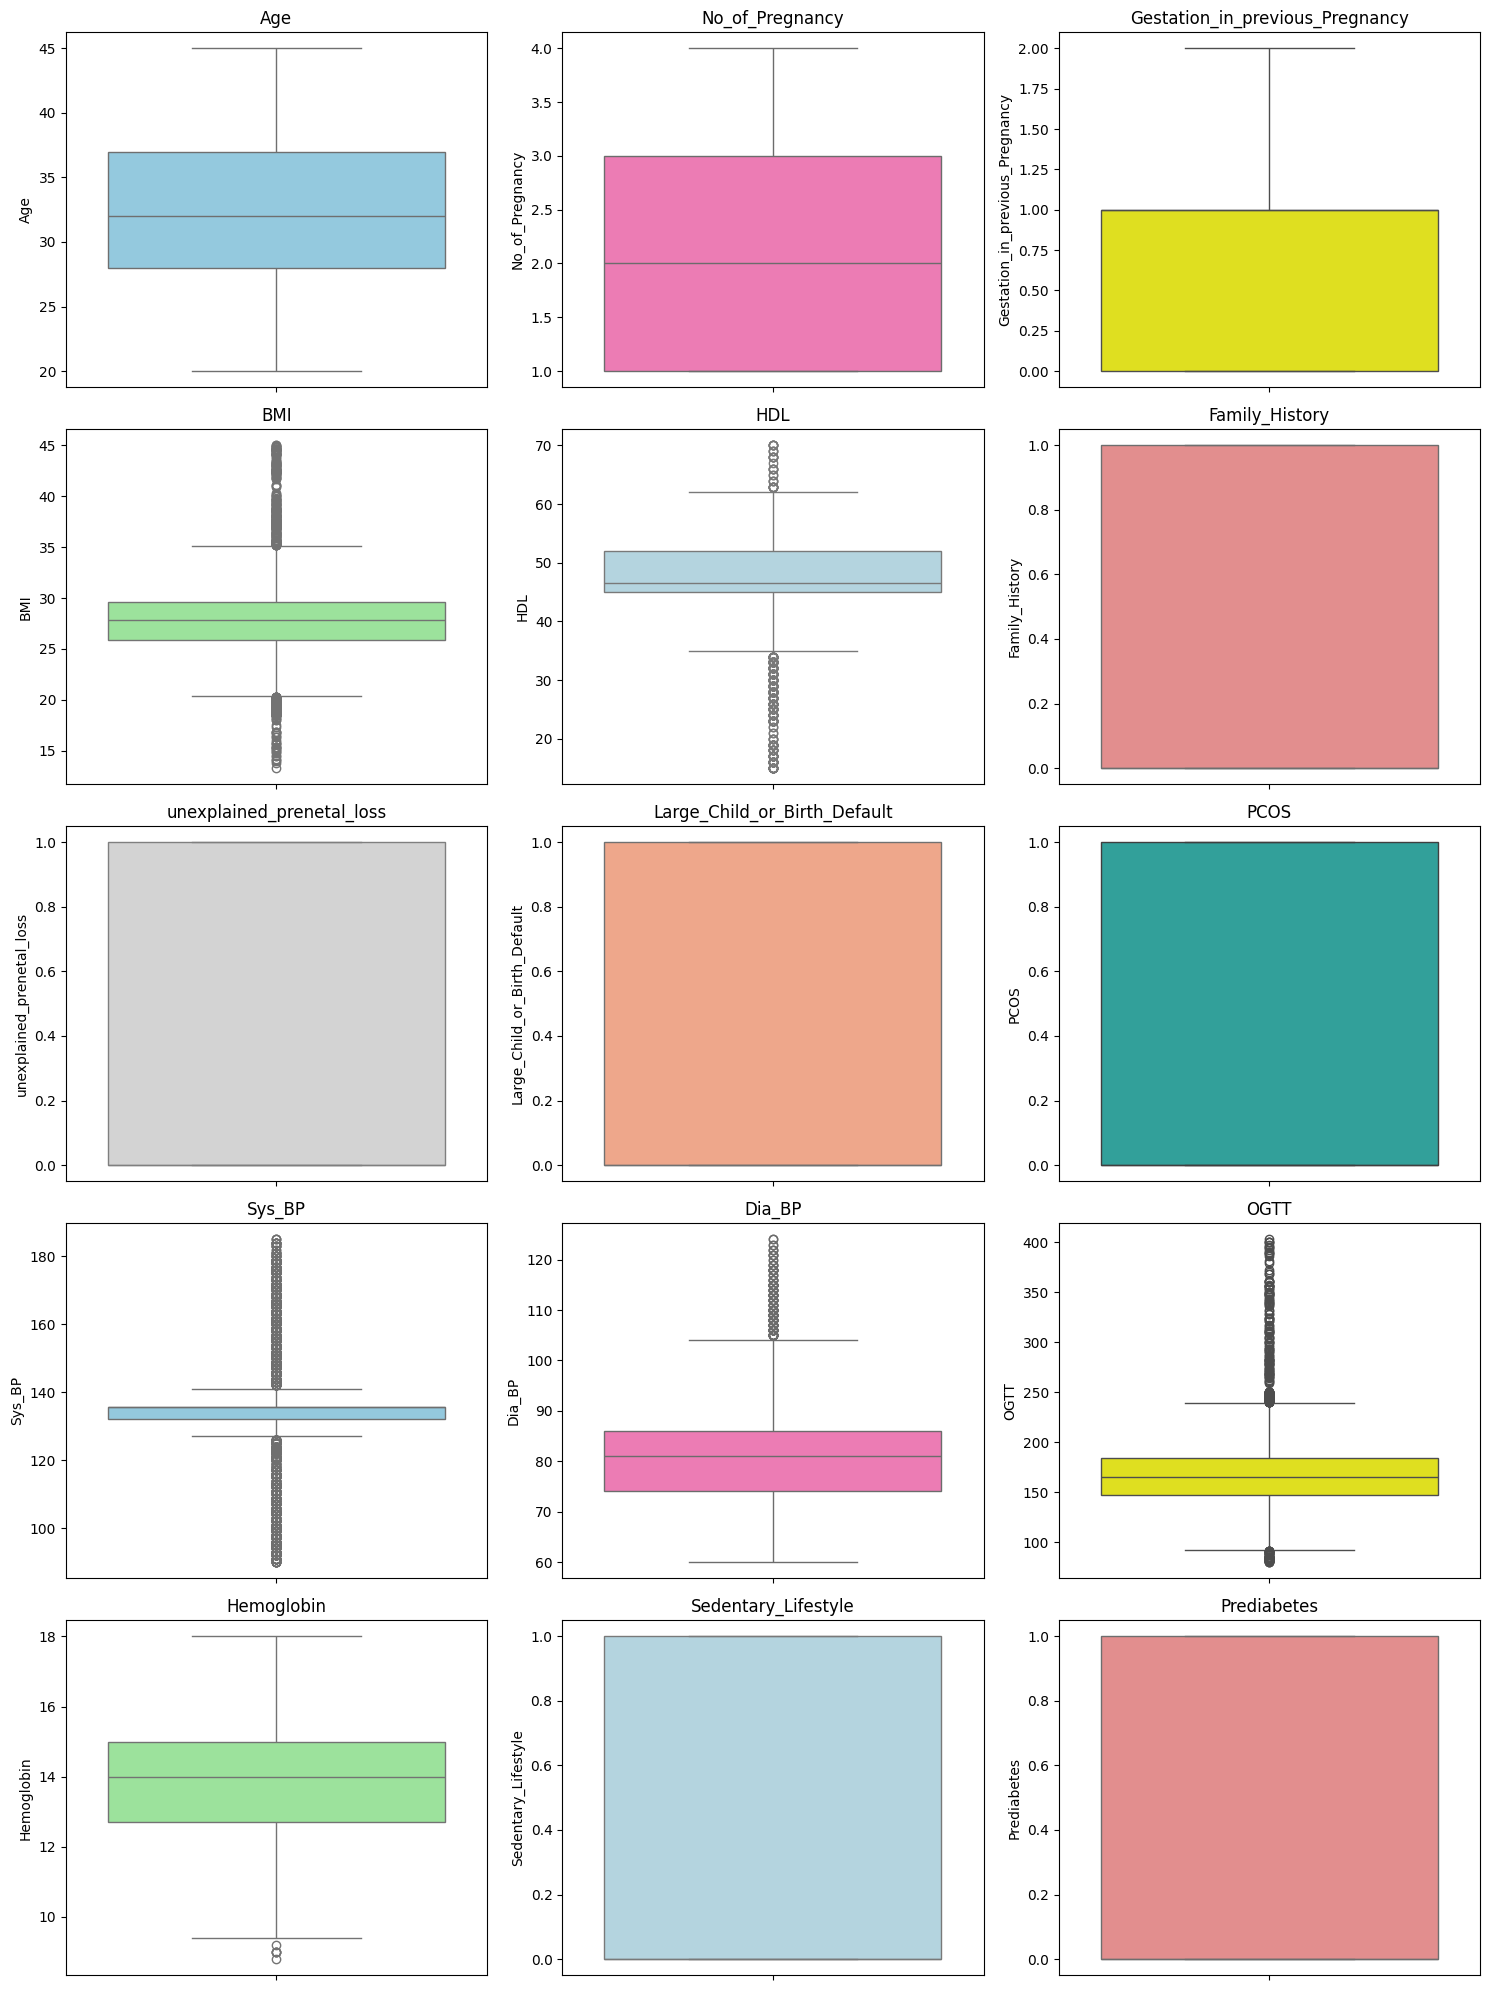

In [71]:
# Selecting all numerical columns, excluding the first and last
columns = df.select_dtypes(include=['float64', 'int64']).columns[1:-1]

# Create subplots with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Define colors for each plot
colors = ['skyblue', 'hotpink', 'yellow', 'lightgreen', 'lightblue', 'lightcoral', 'lightgrey', 'lightsalmon', 'lightseagreen']

# Loop through each column and create a boxplot
for i, col in enumerate(columns):
    row, col_num = divmod(i, 3)
    sns.boxplot(y=df[col], ax=axes[row, col_num], color=colors[i % len(colors)])
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

#### Insights
- We can see that some columns do not have any outliers like Prediabetes, Lifestyle, PCOS, Unexplained Prenatal Loss, Large Child, Family History, Gestation in Previous Pregancy, Number Of Pregnancies & Age.
- And some have a lot of outliers w.r.t median like BMI, HDL, Sys_BP, Dia_BP & OGTT. These will be very important while training.
- Only Haemoglobin have very little outliers which suggest error in data entry. We must check if its too varied or normally close.
  If too varied, then it might be wrong data entry.

In [75]:
# Calculate quartiles and IQR
Q1 = df['Hemoglobin'].quantile(0.25)
Q3 = df['Hemoglobin'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Hemoglobin'] < lower_bound) | (df['Hemoglobin'] > upper_bound)]

# Display the outliers
print("Outliers in Hemoglobin levels:")
print(outliers['Hemoglobin'])

Outliers in Hemoglobin levels:
443    9.0
449    8.8
465    9.2
476    9.0
520    9.0
528    9.0
Name: Hemoglobin, dtype: float64


This is not too varied from normal data so we don't make any changes to it.

### 5. Conclusions
- We found linearly related features which implies they are the most important features.
- We also found that some features which have too many outliers from median are very crucial in training.
- Case Number is not at all related.